<a href="https://colab.research.google.com/github/GitHub-Nishtha/Handwritten-Digit-Prediction/blob/main/CovidDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#for data manipulation
import pandas as pd
import numpy as np
#for data visualization
import seaborn as sns
#for data visualization
import matplotlib.pyplot as plt
#for plotting the data on World Map
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/covid_19_data.csv")
data.head()
data.info()
data = data.drop(["SNo","Last Update"],axis=1)
data.head()
data.info()
#Change data from string to data-time type
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data.info()
data.head()
data['Active Cases'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ObservationDate  306429 non-null  object 
 1   Province/State   228329 non-null  object 
 2   Country/Region   306429 non-null  object 
 3   Confirm

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active Cases
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,1.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,14.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0,6.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0,1.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0,0.0


In [ ]:
#Fbprophet for forecasting
#Should have two columns: Date/Time and Data
#Date/Time should have name ds and Data should have name y
total_active = data.groupby('ObservationDate')['Active Cases'].sum().reset_index()
total_active.head()

,ObservationDate,Active Cases
0,2020-01-22,510.0
1,2020-01-23,1003.0
2,2020-01-24,876.0
3,2020-01-25,1353.0
4,2020-01-26,2006.0


In [ ]:
total_active = total_active.rename(columns={"ObservationDate":"ds","Active Cases":"y"})
total_active.head()

,ds,y
0,2020-01-22,510.0
1,2020-01-23,1003.0
2,2020-01-24,876.0
3,2020-01-25,1353.0
4,2020-01-26,2006.0


In [ ]:
#Creating object of the model
from fbprophet import Prophet
model = Prophet(interval_width=0.95,daily_seasonality=True)

In [ ]:
#Training the model
model.fit(total_active)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
#Creating future dataframe
future_dates = model.make_future_dataframe(periods=20,include_history=True)
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
509,2021-06-14
510,2021-06-15
511,2021-06-16
512,2021-06-17


In [ ]:
ypred = model.predict(future_dates)
ypred[["ds","yhat_lower","yhat","yhat_upper"]].head()
#yhat is the actual data that the model has predicted
#yhat_lower means minimum value and yhat_upper means maximum value which can be present

,ds,yhat_lower,yhat,yhat_upper
0,2020-01-22,-1.594765e+06,-168967.124672,1.291192e+06
1,2020-01-23,-1.653441e+06,-140331.709019,1.438487e+06
2,2020-01-24,-1.524558e+06,-112097.730981,1.316829e+06
3,2020-01-25,-1.633019e+06,-154285.478130,1.394843e+06
4,2020-01-26,-1.510021e+06,-141007.736722,1.285632e+06


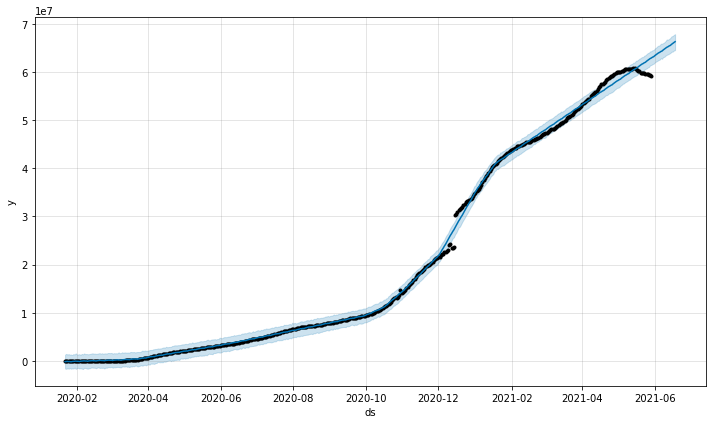

In [ ]:
#Plot the data
active_plot = model.plot(ypred)

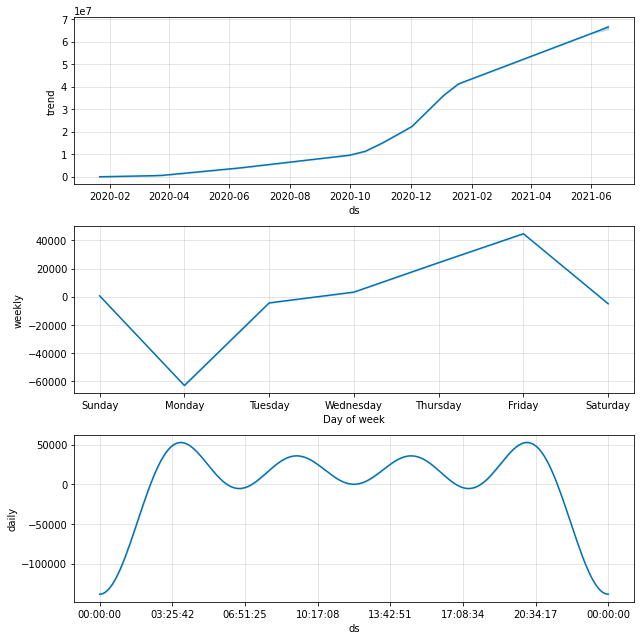

In [ ]:
#Weekly plot
active_plot_week = model.plot_components(ypred)

In [ ]:
india = data[data['Country/Region']=='India']
india_active = india.groupby('ObservationDate')['Active Cases'].sum().reset_index()
india_active.head()

,ObservationDate,Active Cases
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,1.0
3,2020-02-02,2.0
4,2020-02-03,3.0


In [ ]:
india_active = india_active.rename(columns={"ObservationDate":"ds","Active Cases":"y"})
india_active.head()

,ds,y
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,1.0
3,2020-02-02,2.0
4,2020-02-03,3.0


In [ ]:
from fbprophet import Prophet
model = Prophet(interval_width=0.95,daily_seasonality=True)
model.fit(india_active)
future_dates = model.make_future_dataframe(periods=20,include_history=True)
future_dates

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03
...,...
501,2021-06-14
502,2021-06-15
503,2021-06-16
504,2021-06-17


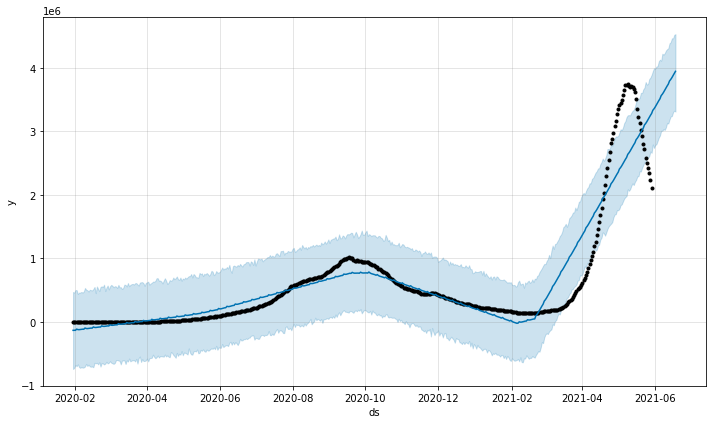

In [ ]:
ypred = model.predict(future_dates)
ypred[["ds","yhat_lower","yhat","yhat_upper"]].tail(25)
active_plot = model.plot(ypred)

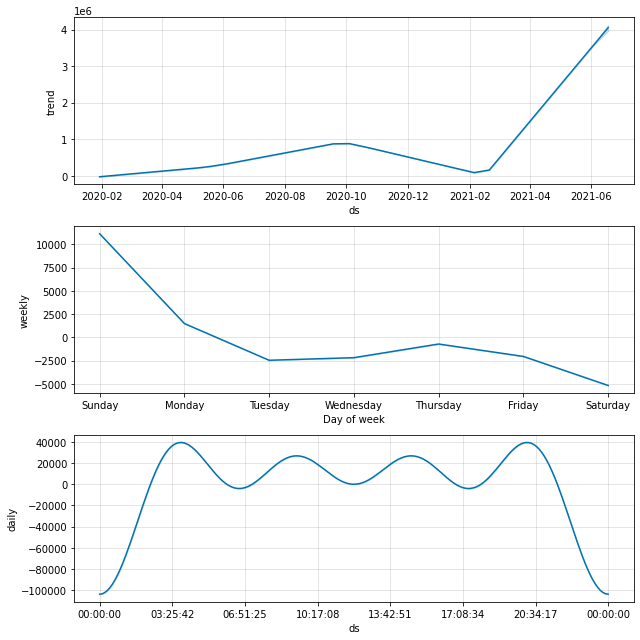

In [ ]:
active_plot_week = model.plot_components(ypred)